### 证明：两层 ReLU 网络逼近 f(x) = sin(2\pi x) + 0.5x^2

1. **分段线性逼近**：  
   ReLU 的定义为 ReLU(x) = max(0, x)，可以通过多段直线的方式逼近非线性函数。  

2. **逼近 sin(2\pi x)**：  
   sin(2\pi x) 在区间 \([0, 1]\) 内是平滑的周期性函数，可以将其分解为若干小区间，在每个区间内用 ReLU 组合来逼近其波动。  

3. **逼近 \(0.5x^2\)**：  
   二次多项式可由 ReLU 的分段线性特性通过多层线性组合逼近。  

4. **组合拟合**：  
   通过调整 ReLU 网络的权重和偏置，并使用足够多的神经元，可以同时逼近上述两个部分，从而逼近整个目标函数。  

### 代码如下

Epoch [100/1000], Loss: 0.0010
Epoch [200/1000], Loss: 0.0002
Epoch [300/1000], Loss: 0.0002
Epoch [400/1000], Loss: 0.0003
Epoch [500/1000], Loss: 0.0002
Epoch [600/1000], Loss: 0.0002
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0002
Epoch [1000/1000], Loss: 0.0001


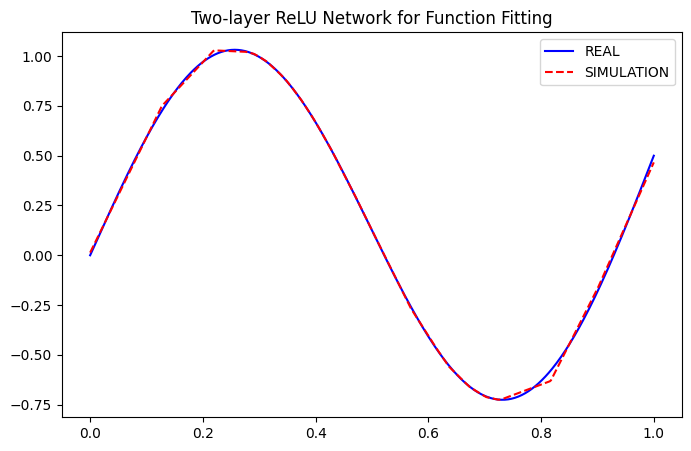

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 目标函数
def target_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * x**2

# 数据准备
x = np.linspace(0, 1, 500)
y = target_function(x)

x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

class ReLU_Network(nn.Module):
    def __init__(self):
        super(ReLU_Network, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

model = ReLU_Network()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 可视化结果
with torch.no_grad():
    y_pred = model(x_tensor).detach().numpy()

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='REAL', color='blue')
plt.plot(x, y_pred, label='SIMULATION', color='red', linestyle='--')
plt.legend()
plt.title('Two-layer ReLU Network for Function Fitting')
plt.show()
